# Importing libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Use a clean style
sns.set(style="whitegrid")


In [6]:
# Load your CSV file
df = pd.read_csv(r"C:\Users\asus\Downloads\index.csv")

# Preview data
print(df.head())


         date                 datetime cash_type                 card  money  \
0  2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   38.7   
1  2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   38.7   
2  2024-03-01  2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   38.7   
3  2024-03-01  2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   28.9   
4  2024-03-01  2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   38.7   

     coffee_name  
0          Latte  
1  Hot Chocolate  
2  Hot Chocolate  
3      Americano  
4          Latte  


# data cleaning

In [7]:
# Convert dates
df['date'] = pd.to_datetime(df['date'])
df['datetime'] = pd.to_datetime(df['datetime'])

# Add hour and day name
df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.day_name()

# Flag for card payment
df['is_card_payment'] = df['cash_type'].apply(lambda x: 1 if x.lower() == 'card' else 0)

# Fill missing card IDs with 'CASH'
df['card'] = df['card'].fillna('CASH')

# Preview again
print(df.head())


        date                datetime cash_type                 card  money  \
0 2024-03-01 2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   38.7   
1 2024-03-01 2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   38.7   
2 2024-03-01 2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   38.7   
3 2024-03-01 2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   28.9   
4 2024-03-01 2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   38.7   

     coffee_name  hour day_of_week  is_card_payment  
0          Latte    10      Friday                1  
1  Hot Chocolate    12      Friday                1  
2  Hot Chocolate    12      Friday                1  
3      Americano    13      Friday                1  
4          Latte    13      Friday                1  


# EDA

## Daily Sales Trend

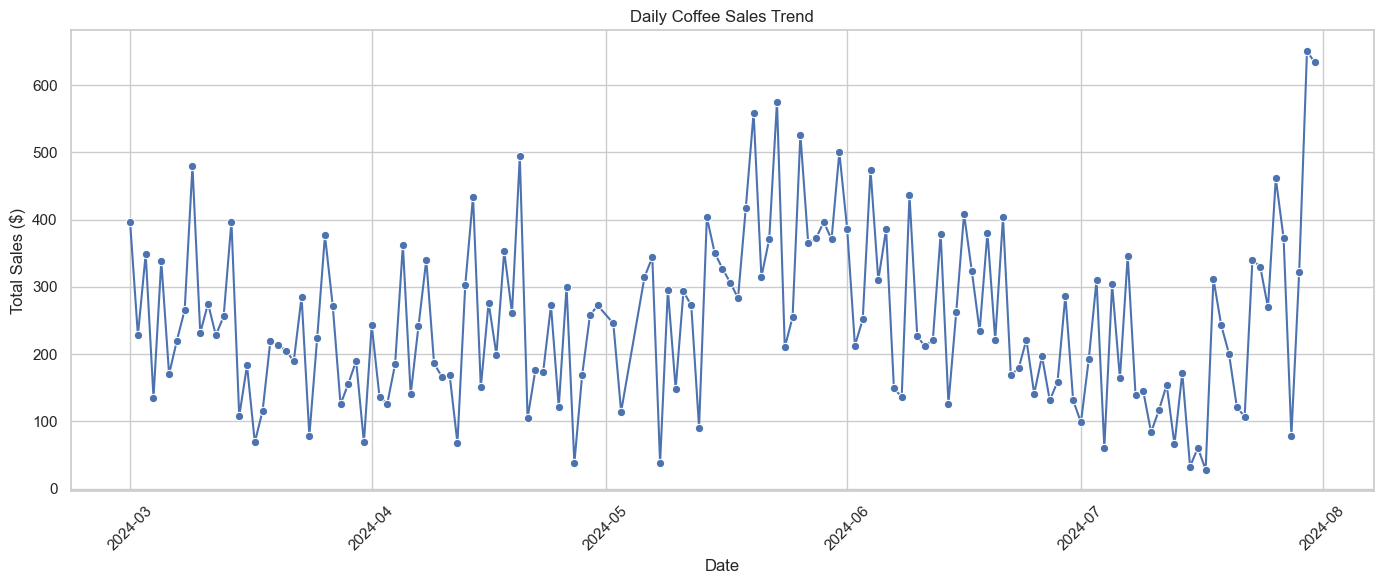

In [8]:
# Group by date
daily_sales = df.groupby('date')['money'].sum().reset_index()

# Plot trend
plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_sales, x='date', y='money', marker='o')
plt.title('Daily Coffee Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Best-Selling Coffees

C:\Users\asus\AppData\Local\Temp\ipykernel_2236\1454369151.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_coffees.values, y=top_coffees.index, palette='viridis')


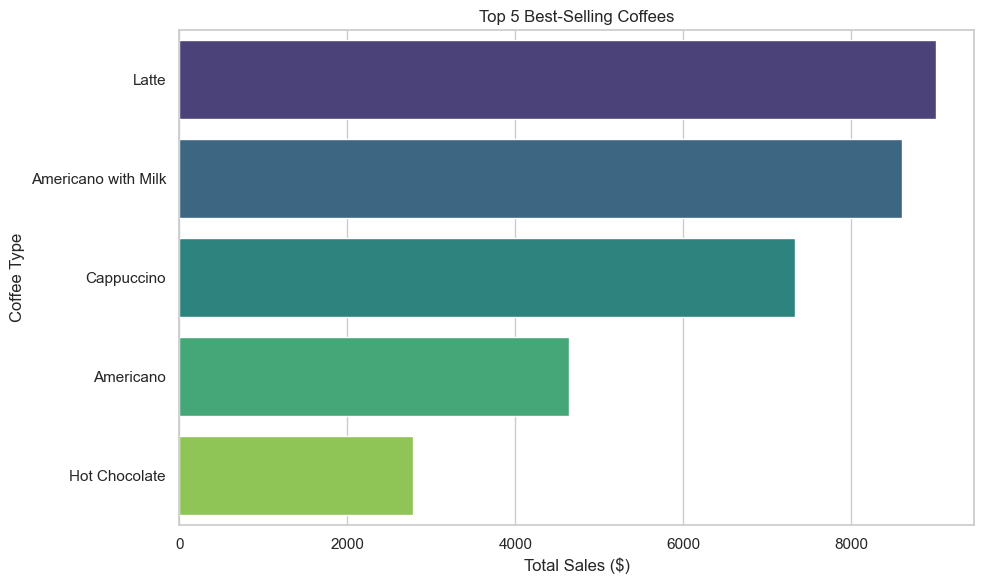

In [9]:
# Group by coffee type
top_coffees = df.groupby('coffee_name')['money'].sum().sort_values(ascending=False).head(5)

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_coffees.values, y=top_coffees.index, palette='viridis')
plt.title('Top 5 Best-Selling Coffees')
plt.xlabel('Total Sales ($)')
plt.ylabel('Coffee Type')
plt.tight_layout()
plt.show()

## Payment Method 

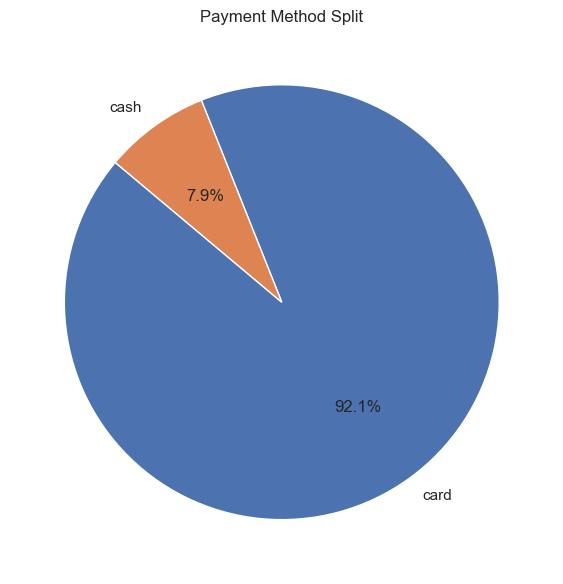

In [10]:
# Count payment types
payment_split = df['cash_type'].value_counts()

# Pie chart
plt.figure(figsize=(6, 6))
payment_split.plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Payment Method Split')
plt.ylabel('')
plt.tight_layout()
plt.show()

## Revenue by Hour

C:\Users\asus\AppData\Local\Temp\ipykernel_2236\3661796541.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hourly_sales, x='hour', y='money', palette='coolwarm')


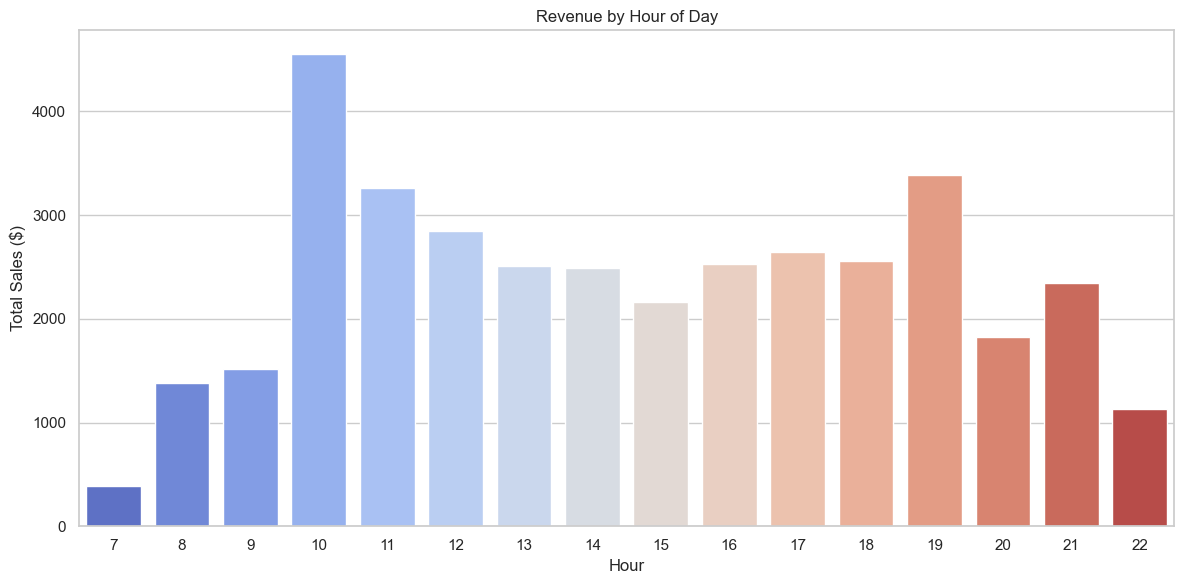

In [11]:
# Group by hour
hourly_sales = df.groupby('hour')['money'].sum().reset_index()

# Bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=hourly_sales, x='hour', y='money', palette='coolwarm')
plt.title('Revenue by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Total Sales ($)')
plt.tight_layout()
plt.show()

## Repeat Card Customers

In [12]:
# Filter out CASH
card_customers = df[df['card'] != 'CASH']

# Count repeat cards
repeat_customers = card_customers['card'].value_counts()
repeat_customers = repeat_customers[repeat_customers > 1]

print(f"Number of repeat card customers: {len(repeat_customers)}")
print(repeat_customers.head(10))


Number of repeat card customers: 165
card
ANON-0000-0000-0012    88
ANON-0000-0000-0009    63
ANON-0000-0000-0097    27
ANON-0000-0000-0003    23
ANON-0000-0000-0040    22
ANON-0000-0000-0141    17
ANON-0000-0000-0001    17
ANON-0000-0000-0024    12
ANON-0000-0000-0180    12
ANON-0000-0000-0059    12
Name: count, dtype: int64


## Daily sales

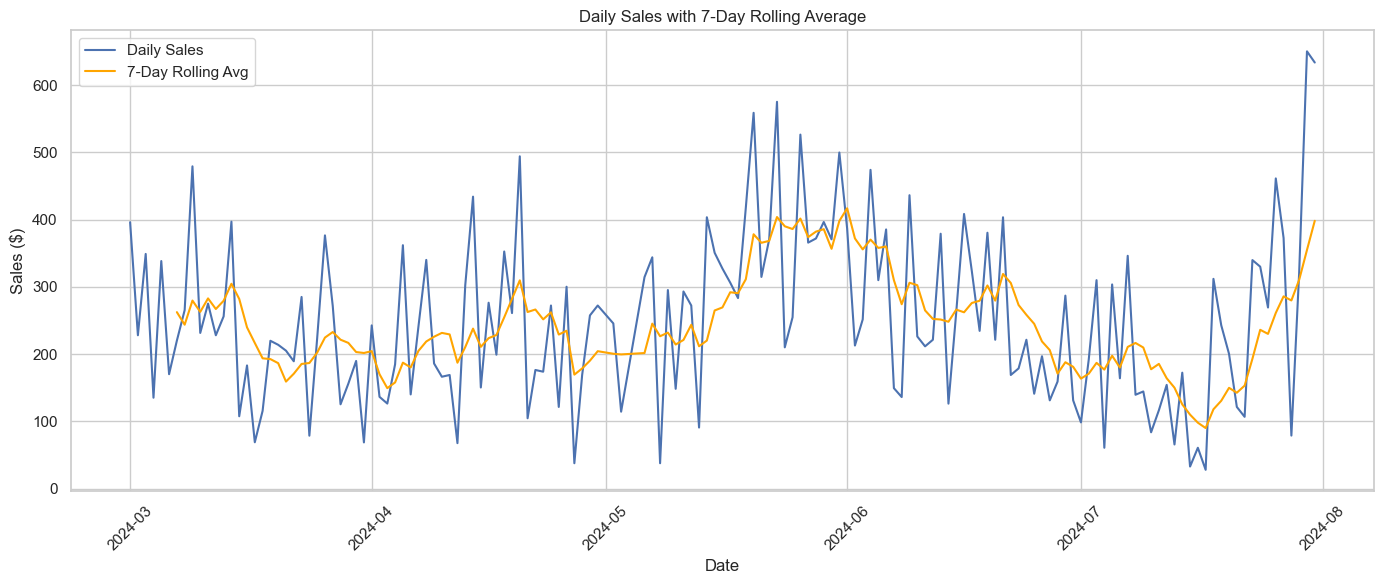

In [13]:
# Calculate daily sales 
daily_sales = df.groupby('date')['money'].sum().reset_index()

# Add 7-day rolling average
daily_sales['7_day_avg'] = daily_sales['money'].rolling(window=7).mean()

# Plot daily vs. rolling
plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_sales, x='date', y='money', label='Daily Sales')
sns.lineplot(data=daily_sales, x='date', y='7_day_avg', label='7-Day Rolling Avg', color='orange')
plt.title('Daily Sales with 7-Day Rolling Average')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## Weekly Sales

C:\Users\asus\AppData\Local\Temp\ipykernel_2236\2113681072.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weekly_sales, x='week', y='money', palette='Blues')


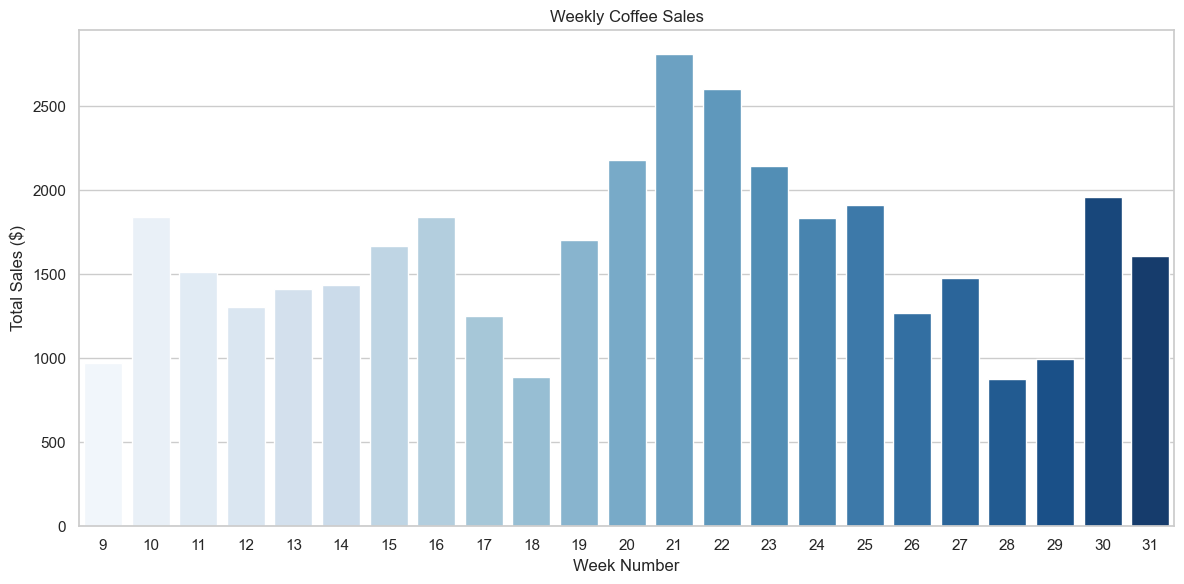

In [14]:
# Add week number
df['week'] = df['date'].dt.isocalendar().week

# Weekly sales sum
weekly_sales = df.groupby('week')['money'].sum().reset_index()

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=weekly_sales, x='week', y='money', palette='Blues')
plt.title('Weekly Coffee Sales')
plt.xlabel('Week Number')
plt.ylabel('Total Sales ($)')
plt.tight_layout()
plt.show()


## Monthly Sales

C:\Users\asus\AppData\Local\Temp\ipykernel_2236\4031690142.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_sales, x='month', y='money', palette='Purples')


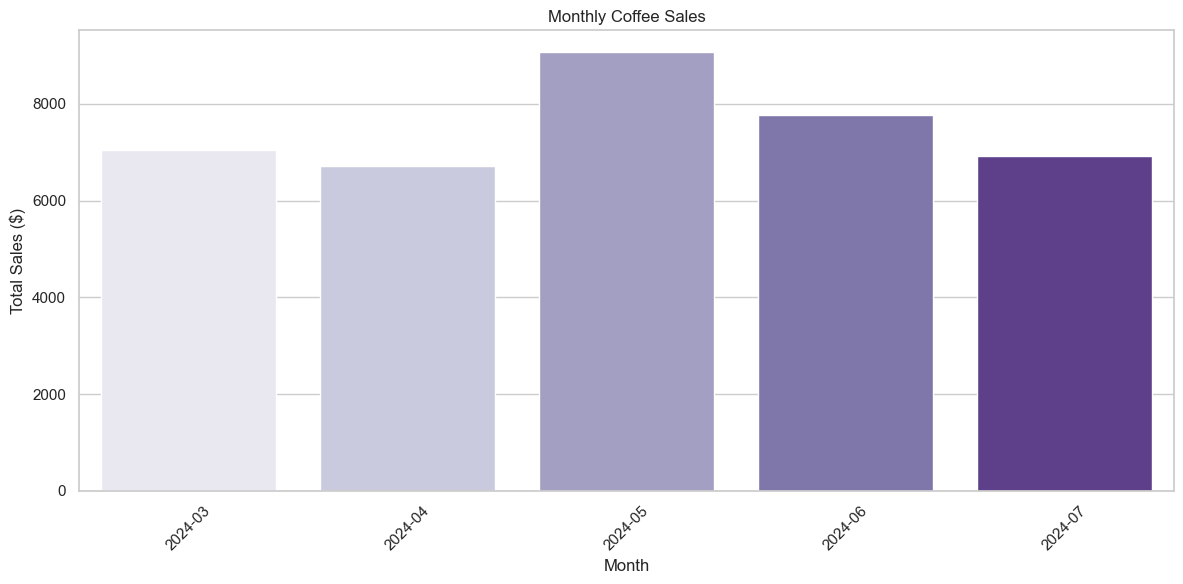

In [15]:
# Add month period
df['month'] = df['date'].dt.to_period('M')

# Monthly sales sum
monthly_sales = df.groupby('month')['money'].sum().reset_index()

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_sales, x='month', y='money', palette='Purples')
plt.title('Monthly Coffee Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##  Individual Customer Purchase History

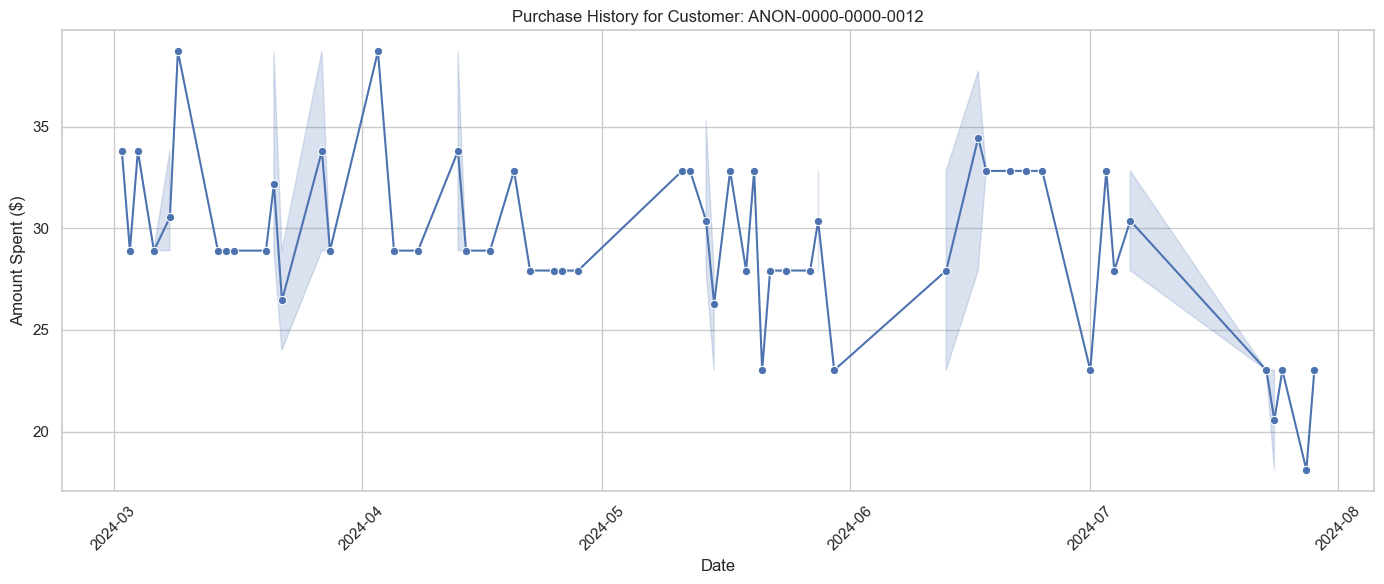

           date          coffee_name  money
14   2024-03-02  Americano with Milk  33.80
21   2024-03-03            Americano  28.90
30   2024-03-04  Americano with Milk  33.80
42   2024-03-06            Americano  28.90
43   2024-03-06              Cortado  28.90
...         ...                  ...    ...
1027 2024-07-24             Espresso  18.12
1033 2024-07-24            Americano  23.02
1034 2024-07-25            Americano  23.02
1073 2024-07-28             Espresso  18.12
1077 2024-07-29            Americano  23.02

[88 rows x 3 columns]


In [16]:
# Get repeat customers again
repeat_customers = df[df['card'] != 'CASH']['card'].value_counts()
repeat_customers = repeat_customers[repeat_customers > 1]

# Pick one repeat customer ID
sample_customer = repeat_customers.index[0]

# Filter purchases for this customer
customer_df = df[df['card'] == sample_customer]

# Plot their purchases over time
plt.figure(figsize=(14, 6))
sns.lineplot(data=customer_df, x='date', y='money', marker='o')
plt.title(f'Purchase History for Customer: {sample_customer}')
plt.xlabel('Date')
plt.ylabel('Amount Spent ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Show details
print(customer_df[['date', 'coffee_name', 'money']])

# 📊 Coffee Sales Interactive Dashboard (Dash)

In [21]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px

# Load & preprocess data
df = pd.read_csv(r"C:\Users\asus\Downloads\index.csv")
df['date'] = pd.to_datetime(df['date'])
df['datetime'] = pd.to_datetime(df['datetime'])
df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.day_name()
df['card'] = df['card'].fillna('CASH')

# Start Dash App
app = dash.Dash(__name__)
app.title = "Coffee Sales Dashboard"

# App Layout

app.layout = html.Div([
    html.H1("☕ Coffee Sales Dashboard", style={'textAlign': 'center'}),

    html.Div([
        html.Label("Select Coffee Type:"),
        dcc.Dropdown(
            id='coffee-dropdown',
            options=[{'label': coffee, 'value': coffee} for coffee in df['coffee_name'].unique()],
            value=df['coffee_name'].unique()[0]
        ),
    ], style={'width': '50%', 'margin': 'auto'}),

    dcc.Graph(id='sales-trend'),

    dcc.Graph(id='sales-by-hour'),

    dcc.Graph(id='payment-method-pie'),
])

# Callbacks

@app.callback(
    Output('sales-trend', 'figure'),
    Input('coffee-dropdown', 'value')
)
def update_sales_trend(selected_coffee):
    filtered = df[df['coffee_name'] == selected_coffee]
    trend = filtered.groupby('date')['money'].sum().reset_index()
    fig = px.line(trend, x='date', y='money',
                  title=f'Daily Sales Trend for {selected_coffee}')
    return fig

@app.callback(
    Output('sales-by-hour', 'figure'),
    Input('coffee-dropdown', 'value')
)
def update_sales_by_hour(selected_coffee):
    filtered = df[df['coffee_name'] == selected_coffee]
    hourly = filtered.groupby('hour')['money'].sum().reset_index()
    fig = px.bar(hourly, x='hour', y='money',
                 title=f'Sales by Hour for {selected_coffee}')
    return fig

@app.callback(
    Output('payment-method-pie', 'figure'),
    Input('coffee-dropdown', 'value')
)
def update_payment_method(selected_coffee):
    filtered = df[df['coffee_name'] == selected_coffee]
    pie = filtered['cash_type'].value_counts().reset_index()
    pie.columns = ['cash_type', 'count']

    if pie.empty:
        pie = pd.DataFrame({
            'cash_type': ['No Data'],
            'count': [1]
        })

    fig = px.pie(pie, names='cash_type', values='count',
                 title=f'Payment Method Split for {selected_coffee}')
    return fig


# Run App
if __name__ == '__main__':
    app.run(debug=True)



In [24]:
from fpdf import FPDF

pdf = FPDF()
pdf.add_page()
pdf.set_auto_page_break(auto=True, margin=15)

# Title
pdf.set_font("Arial", 'B', 16)
pdf.cell(0, 10, "Coffee Shop Sales Analysis Report", ln=True, align='C')

pdf.ln(10)
pdf.set_font("Arial", '', 12)

# Define sections as short chunks
sections = [
    ("Project Title", "Coffee Shop Sales Analysis and Dashboard"),
    ("Objective", "Analyze coffee shop sales data to identify daily and seasonal trends, best-selling products, customer behavior, payment preferences, and present results via an interactive dashboard."),
    ("Dataset Description", "- File: index.csv\n- Key columns: date, datetime, coffee_name, money, cash_type, card"),
    ("Tools Used", "- Python (Pandas, Seaborn, Matplotlib, Plotly, Dash, Prophet)"),
    ("Key Steps & Analysis", "1. Data cleaning & preprocessing\n2. Exploratory Data Analysis\n3. Forecasting with Prophet\n4. Interactive Dashboard (Dash)"),
    ("Key Insights", "- Peak days and seasonal trends\n- Best-selling products identified\n- Peak hours confirmed\n- Card vs Cash usage\n- Repeat customers found"),
    ("Recommendations", "- Promote top products\n- Run off-peak offers\n- Reward loyal customers\n- Adjust for seasonal changes"),
    ("Creator", "Created by: Ambrose Henry")
]

for title, content in sections:
    pdf.set_font("Arial", 'B', 12)
    pdf.cell(0, 10, title, ln=True)
    pdf.set_font("Arial", '', 12)
    pdf.multi_cell(0, 10, content)
    pdf.ln(5)

pdf.output("Coffee_Sales_Report.pdf")

print("✅ PDF saved as Coffee_Sales_Report.pdf")


✅ PDF saved as Coffee_Sales_Report.pdf
